# Project For Applied Artificial Intellence Class 501
Strategic Planning of Cycling Infrastructure Through
Built Environment Analysis and Network Optimization

In [12]:
! pip install osmnx
import os
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt

In [3]:
# Increase max query area size (e.g., to 100km * 100km)
# The default is 50km * 50km = 2,500,000,000
#new_max_size = 100000 * 100000  # units are meters
#ox.config(max_query_area_size=new_max_size)

# download/model a street network for some city then visualize it
G = ox.graph.graph_from_place("Holland, Netherlands", network_type="bike")
fig, ax = ox.plot.plot_graph(G)

/usr/local/lib/python3.11/dist-packages/osmnx/_overpass.py:267: UserWarning: This area is 770 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


KeyboardInterrupt: 

In [4]:
#-------------------------------EDA-------------------------------------

G = ox.graph_from_place("Amsterdam, Netherlands", network_type="bike") #Just exploring
nodes, edges = ox.graph_to_gdfs(G)

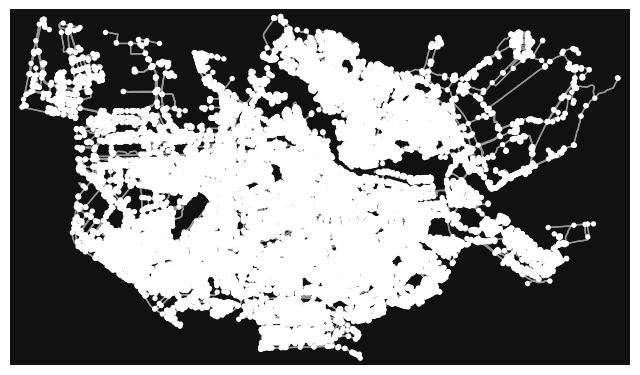

In [5]:
fig, ax = ox.plot.plot_graph(G)

In [7]:
nodes, edges = ox.graph_to_gdfs(G)
nodes.head()

,y,x,street_count,highway,railway,ref,geometry
osmid,,,,,,,
6316199,52.370173,4.888396,4,NaN,NaN,NaN,POINT (4.8884 52.37017)
25596477,52.367000,4.906097,3,NaN,NaN,NaN,POINT (4.9061 52.367)
25645990,52.366326,4.926110,3,NaN,NaN,NaN,POINT (4.92611 52.36633)
25658577,52.365959,4.930890,3,NaN,NaN,NaN,POINT (4.93089 52.36596)
25658578,52.365569,4.930769,3,NaN,NaN,NaN,POINT (4.93077 52.36557)


In [8]:
edges.head()

osmid      highway  \
u        v         key                                               
6316199  26605707  0                          4745774     cycleway   
         46379627  0    [38297120, 7372610, 38297119]  residential   
         46389218  0                          7372614  residential   
25596477 252100622 0                         23289374   pedestrian   
         687718509 0                         23289375  residential   

                                                              name  oneway  \
u        v         key                                                       
6316199  26605707  0                                     Raamsteeg   False   
         46379627  0    [Joes Kloppenburgbrug, Oude Spiegelstraat]   False   
         46389218  0                                        Singel    True   
25596477 252100622 0                      Jonas Daniël Meijerplein   False   
         687718509 0                            Nieuwe Herengracht   False   

                       width reversed      length  \
u        v         key                              
6316199  26605707  0    1.80     True   50.190831   
         46379627  0     NaN    False   42.496919   
         46389218  0     NaN    False  225.577040   
25596477 252100622 0     NaN     True   89.761236   
         687718509 0     NaN    False   61.291976   

                                                                 geometry  \
u        v         key                                                      
6316199  26605707  0    LINESTRING (4.8884 52.37017, 4.88847 52.37017,...   
         46379627  0    LINESTRING (4.8884 52.37017, 4.88827 52.37018,...   
         46389218  0    LINESTRING (4.8884 52.37017, 4.88873 52.37195,...   
25596477 252100622 0    LINESTRING (4.9061 52.367, 4.90576 52.36687, 4...   
         687718509 0    LINESTRING (4.9061 52.367, 4.90612 52.36702, 4...   

                       maxspeed bridge service lanes  ref access tunnel  \
u        v         key                                                    
6316199  26605707  0        NaN    NaN     NaN   NaN  NaN    NaN    NaN   
         46379627  0         30    yes     NaN   NaN  NaN    NaN    NaN   
         46389218  0         30    NaN     NaN   NaN  NaN    NaN    NaN   
25596477 252100622 0        NaN    NaN     NaN   NaN  NaN    NaN    NaN   
         687718509 0         30    NaN     NaN   NaN  NaN    NaN    NaN   

                       junction est_width area  
u        v         key                          
6316199  26605707  0        NaN       NaN  NaN  
         46379627  0        NaN       NaN  NaN  
         46389218  0        NaN       NaN  NaN  
25596477 252100622 0        NaN       NaN  NaN  
         687718509 0        NaN       NaN  NaN

In [17]:
null_length=edges['length'].isna().sum()
max_length=edges['length'].max()

print(null_length)
print(max_length)

0
2540.064723416302


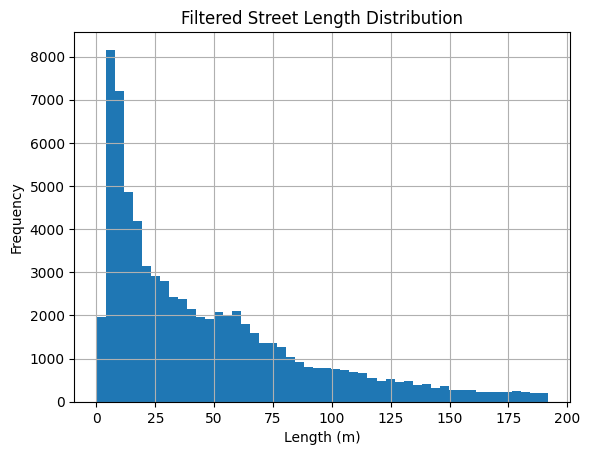

In [18]:
threshold = edges['length'].quantile(0.95) #Using 95% to avoid outliers that distort the scale of the plot
filtered_edges = edges[edges['length'] <= threshold]
filtered_edges['length'].hist(bins=50)
plt.title("Filtered Street Length Distribution")
plt.xlabel("Length (m)")
plt.ylabel("Frequency")
plt.show()

The histogram shows a strongly right-skewed distribution of street segment lengths, with most values concentrated between 0 and 25 meters. This indicates that the cycling network is made up of very short and highly segmented paths, which may reflect dense infrastructure, frequent intersections, or mapping granularity. By removing the top 5% of outliers, the analysis focuses on the core structure without distortion from unusually long segments.

Text(0.5, 0, 'Count')

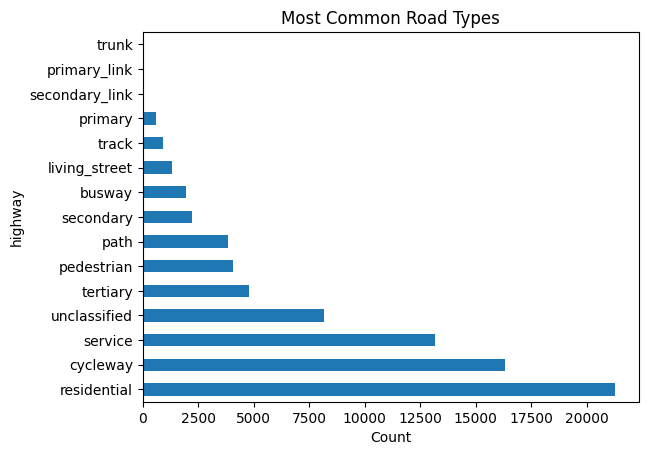

In [21]:
edges['highway'].explode().value_counts().head(15).plot(kind='barh')
plt.title("Most Common Road Types")
plt.xlabel("Count")